In [1]:
df = pd.read_hdf('/home/klay6683/to_keep/l1a_dark_scan.h5', 'df')
# df = pd.read_hdf('/Users/klay6683/data/iuvs/l1a_dark_scan.h5', 'df')

## using previously defined clean up function

In [3]:
from iuvs import meta

In [4]:
df = meta.clean_up_dark_scan(df)

#### creating little checking function:

In [5]:
def check_values(col):
    return df[col.upper()].value_counts(dropna=False)

In [6]:
df.columns

Index(['ANC_SVN_REVISION', 'BIN_PATTERN_INDEX', 'BIN_TBL', 'CADENCE',
       'CASE_TEMP', 'CHANNEL', 'CODE_SVN_REVISION', 'COLLECTION_ID',
       'DET_TEMP', 'DUTY_CYCLE', 'FILENAME', 'FOV_DEG', 'INT_TIME',
       'LYA_CENTROID', 'MCP_VOLT', 'MIRROR_DEG', 'MIRROR_DN', 'MIR_DEG',
       'MISSION_PHASE', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'N_FILL',
       'OBS_ID', 'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_ID', 'SOLAR_LONGITUDE',
       'TARGET_NAME', 'TIME_OF_INT', 'mean', 'median', 'std', 'BINNING_SET'],
      dtype='object')

In [7]:
check_values('collection_id')

limb           19085
disk           18143
corona          5646
cruise          4362
transition      3422
occultation      434
calibration      214
Name: COLLECTION_ID, dtype: int64

In [8]:
df[df.COLLECTION_ID=='cruise'].ORBIT_NUMBER.value_counts()

0    4362
Name: ORBIT_NUMBER, dtype: int64

## removing cruise and transition for being too special for now

In [9]:
df = df[df.COLLECTION_ID!='cruise']

In [10]:
df[df.COLLECTION_ID == 'transition'].index

Int64Index([   28,    36,    37,    52,    53,    54,    55,    56,    57,
               58, 
            ...
            51115, 51118, 51158, 51159, 51218, 51219, 51266, 51301, 51303,
            51304],
           dtype='int64', length=3422)

In [11]:
df = df[df.COLLECTION_ID!='transition']

In [ ]:
df = df.sort_index()

In [13]:
%matplotlib nbagg

In [14]:
import seaborn as sns

/usr/local/python3/miniconda/lib/python3.4/site-packages/matplotlib-1.5.dev1-py3.4-linux-x86_64.egg/matplotlib/__init__.py:866: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


/usr/local/python3/miniconda/lib/python3.4/site-packages/matplotlib-1.5.dev1-py3.4-linux-x86_64.egg/matplotlib/__init__.py:886: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<IPython.core.display.Javascript object>


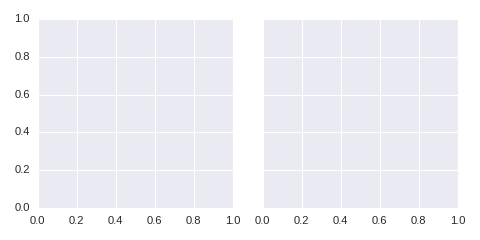

In [16]:
g = sns.FacetGrid(df, col='CHANNEL')
g.map(plt.scatter, )

In [ ]:
plt.figure()
sns.boxplot(x='COLLECTION_ID', y='mean', hue='CHANNEL', data=df)

In [ ]:
plt.figure()
sns.violinplot(x='COLLECTION_ID', y='median', hue='CHANNEL', data=df,
               split=True, cut=0)

In [ ]:
plt.figure()
sns.violinplot(x='COLLECTION_ID', y='median', data=df, hue='CHANNEL', inner=None,
               bw=.1, scale='count', scale_hue=False, cut=0)
sns.stripplot(x='COLLECTION_ID', y='median', data=df, jitter=True, size=3)

In [ ]:
plt.figure()
sns.barplot(x='COLLECTION_ID', y='mean', hue='CHANNEL', data=df)

In [ ]:
df = df[df.INT_TIME.isin([1.4, 4.2, 14.4])]

In [ ]:
df = df.sort_values(by='INT_TIME')

In [ ]:
plt.figure()
sns.pointplot(hue='COLLECTION_ID', y='mean', x='INT_TIME', data=df)

In [ ]:
%matplotlib inline

In [ ]:
df.columns

In [ ]:
to_drop = []
for col in df:
    n_unique = len(df[col].unique())
    if n_unique == 1:
        print(col)
        print(df[col].unique())
        to_drop.append(col)
df = df.drop(to_drop, axis=1)

In [ ]:
df.INT_TIME.value_counts()/df.INT_TIME.size

In [ ]:
sns.lmplot(x='DET_TEMP', y='median', hue='CHANNEL',
           col='INT_TIME', row='COLLECTION_ID', data=df, size=4)

In [ ]:
g = sns.FacetGrid(df, row='INT_TIME', hue='CHANNEL', size=1.7, aspect=4,)
g.map(sns.distplot, 'mean')

In [ ]:
df.BINNING_SET = df.BINNING_SET.astype('category')

In [ ]:
sns.jointplot(x='DET_TEMP',y='mean', data=df[(df.CHANNEL=='MUV') & (df.INT_TIME==14.4)])

In [ ]:
s = df.PRODUCT_ID.str.split('_')
s = s.map(lambda x: x[3]).str.split('-')
df['activity'] = s.map(lambda x: x[0])

In [ ]:
sns.lmplot(x='DET_TEMP', y='mean',hue='CHANNEL', data=df, aspect=1.33, size=8)

In [ ]:
ax = sns.lmplot(x='DET_TEMP', y='mean',hue='CHANNEL', data=df[df.INT_TIME==14.4],
           aspect=1.33, size=6)
plt.gcf().tight_layout()

In [ ]:
df.groupby(['INT_TIME','BINNING_SET']).size()

In [ ]:
df.columns

In [ ]:
sns.set()
sns.pairplot(df['channel case_temp det_temp int_time solar_longitude'.upper().split() + ['mean']].dropna(),
             hue='INT_TIME')

In [ ]:
df[df['mean']>1.0].COLLECTION_ID.value_counts()

In [ ]:
df.COLLECTION_ID.value_counts()

In [ ]:
sns.set_context('talk')

In [ ]:
plt.figure()
ax = sns.stripplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
              jitter=True)
ax.set_title("Dark mean vs INT_TIME")

In [ ]:
plt.figure()
ax = sns.boxplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
                )
ax.set_title("Dark mean vs INT_TIME")

In [ ]:
plt.figure()
ax = sns.boxplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
                )
ax.set_title("Dark mean vs INT_TIME")

In [ ]:
plt.figure()
ax = sns.violinplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
                   split=True, cut=0, scale='area')
ax.set_title("Dark mean vs INT_TIME")

In [ ]:
sns.violinplot?

In [ ]:
plt.figure()
ax = sns.violinplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
                   split=True, cut=0, scale='count')
sns.stripplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
              jitter=True, size=4)
ax.set_title("Dark mean vs INT_TIME")

In [ ]:
sns.violinplot?

In [ ]:
plt.figure()
sns.distplot(df.loc[(df.INT_TIME==4.2) & (df['mean']<1), 'mean'].dropna())

In [ ]:
df.INT_TIME.value_counts()

In [ ]:
df[df.INT_TIME==14.4]['mean'].dropna().size

In [ ]:
plt.figure()
ax = sns.violinplot(x='INT_TIME', y='std', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
                   split=True, cut=0, scale='count', inner=None, bw=.2)
sns.stripplot(x='INT_TIME', y='std', hue='CHANNEL', data=df.sort_values(by='INT_TIME'),
              jitter=False, alpha=0.7, size=4)
ax.set_title("Dark STD vs INT_TIME")

In [ ]:
plt.figure()
sns.barplot(x='INT_TIME', y='mean', hue='CHANNEL', data=df.sort_values(by='INT_TIME'))

In [ ]:
plt.figure()
ax = sns.countplot(x='INT_TIME', data=df.sort_values(by='INT_TIME'), palette='Greens_d',
                  hue='CHANNEL')
ax.set_title('Counts of integrations per INT_TIME')

In [ ]:
df = df[df.INT_TIME.isin([1.4, 4.2, 14.4])]

In [ ]:
g = sns.PairGrid(df, x_vars=['INT_TIME'], hue='CHANNEL',
                y_vars=['mean','std'], size=3.5)
g.map(sns.violinplot)

## Compare with HK

In [ ]:
from iuvs import hk

In [ ]:
hkdb = pd.read_hdf('/home/klay6683/to_keep/HK_DB.h5', 'df')

In [ ]:
hkdb['2015'][['MUV_DET_TEMP_C']].resample('1min').plot()

In [ ]:
check_values('lya_centroid')

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.groupby(['CHANNEL', 'COLLECTION_ID','INT_TIME'])['median'].mean()

In [ ]:
%matplotlib nbagg

In [ ]:
df['mean'].max()

In [ ]:
df[df['mean']> 20].filter(regex='NAXIS.')

In [ ]:
df[df['mean']> 20].PRODUCT_ID.values

In [ ]:
plt.figure()
df['mean'].plot(kind='hist', bins=100, logy=True, xlim=(0,3))

In [ ]:
l1a = io.L1AReader('mvn_iuv_l1a_apoapse-orbit01597-muvdark_20150725T184050_v02_r01.fits.gz',
                   env='production')

In [ ]:
l1a

In [ ]:
l1a.img.shape

In [ ]:
l1a.img.mean()

In [ ]:
l1a.p 

In [ ]:
df.groupby(['activity','COLLECTION_ID'])['mean'].mean()

In [ ]:
cols_of_interest = df.columns.drop('anc_svn_revision  bin_tbl code_svn_revision obs_id'
                                   ' orbit_number process product_id'.upper().split())

In [ ]:
# df.CHANNEL = df.CHANNEL.map(lambda x: 0 if x=='MUV' else 1)

In [ ]:
df=df[cols_of_interest]
# df = df.select_dtypes(include=[float, int])
# df= df.drop('SW_VER NAXIS3'.split(), axis=1)

In [ ]:
df = df.dropna(how='any')

In [ ]:
df.to_hdf('/Users/klay6683/data/iuvs/dark_stuff/to_study.h5','df')

In [ ]:
df.head()

# Odd things

## Difference between MIRROR_DEG and MIR_DEG

In [ ]:
df['mirdeg_delta'] = df.MIRROR_DEG - df.MIR_DEG

In [ ]:
plt.figure()
df.mirdeg_delta.plot(style='.')